# Preliminary Paleomagnetic Analysis of the Zavkhan Volcanics

## Import Modules

In [3]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/taylorkilian/PmagPy')
import pandas as pd
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from mpl_toolkits.basemap import Basemap
%matplotlib inline
pd.set_option('display.max_columns', 30)

### Import specimen and site level data from MagIC files

The following files were created using the demag_gui.py (after magnetometer files were converted using CIT_magic.py). Some samples have been marked as bad using the interpretation editor in the demag_gui. 

What follows is an investigation into the sit mean directions from the first batch of Zavkhan Formation samples from Ulaan Bulagen.

In [4]:
Zavkhan_b1_site_locs = pd.read_csv('../Data/Batch_1/Batch_1_compiled/er_sites.txt',sep='\t',header=1)
Zavkhan_b1_data_raw = pd.read_csv('../Data/Batch_1/Batch_1_compiled/pmag_specimens.txt',sep='\t',header=1)
Zavkhan_b1_site_means = pd.read_csv('../Data/Batch_1/Batch_1_compiled/pmag_sites.txt',sep='\t',header=1)
Zav_batch_one_site_bedding = pd.read_csv('../Code/tables/site_tilt_corrections.txt',sep='\t',header=0,index_col=0)

In [5]:
#used to test min and max values for each variable
test1 = Zavkhan_b1_data_raw[Zavkhan_b1_data_raw['specimen_comp_name'] == 'MID']
test1.measurement_step_min.unique()

array([573, 623, 523, 698, 673, 473, 423, 723])

Parse mean directions by components (LOW, MAG, HEM, or MID) and also into two different files - geographic and tilt-corrected coordinates.

## Low temperature component - present local field overprint

In [7]:
Zavkhan_b1_low = Zavkhan_b1_site_means[Zavkhan_b1_site_means['site_comp_name'] == 'LOW']
b1_low_geo = Zavkhan_b1_low[Zavkhan_b1_low['site_tilt_correction'] == 0]
b1_low_tc = Zavkhan_b1_low[Zavkhan_b1_low['site_tilt_correction'] == 100]

# eliminate site means that have large a95 or and statistically meaningless
b1_low_geo_edit = b1_low_geo[(b1_low_geo.site_comp_name != 'LOW') | (b1_low_geo.er_site_name !='Z64')]
b1_low_tc_edit = b1_low_tc[(b1_low_tc.site_comp_name != 'LOW') | (b1_low_tc.er_site_name !='Z64')]
b1_low_geo_edit = b1_low_geo_edit[(b1_low_geo_edit.site_comp_name != 'LOW') | (b1_low_geo_edit.er_site_name !='Z85')]
b1_low_tc_edit = b1_low_tc_edit[(b1_low_tc_edit.site_comp_name != 'LOW') | (b1_low_tc_edit.er_site_name !='Z85')]
b1_low_geo_edit = b1_low_geo_edit[(b1_low_geo_edit.site_comp_name != 'LOW') | (b1_low_geo_edit.er_site_name !='Z89')]
b1_low_tc_edit = b1_low_tc_edit[(b1_low_tc_edit.site_comp_name != 'LOW') | (b1_low_tc_edit.er_site_name !='Z89')]

# make table (array, rather) to plot excluded data points with crosses through them
b1_low_geo_excl_dec,b1_low_tc_excl_dec,b1_low_geo_excl_inc,b1_low_tc_excl_inc = [],[],[],[]
b1_low_geo_excl_dec.append(round(b1_low_geo.site_dec[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name=='Z64'],1))
b1_low_geo_excl_dec.append(round(b1_low_geo.site_dec[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name== 'Z85'],1))
b1_low_geo_excl_dec.append(round(b1_low_geo.site_dec[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name== 'Z89'],1))
b1_low_geo_excl_inc.append(round(b1_low_geo.site_inc[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name== 'Z64'],1))
b1_low_geo_excl_inc.append(round(b1_low_geo.site_inc[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name== 'Z85'],1))
b1_low_geo_excl_inc.append(round(b1_low_geo.site_inc[b1_low_geo.site_comp_name=='LOW'][b1_low_geo.er_site_name== 'Z89'],1))
b1_low_tc_excl_dec.append(round(b1_low_tc.site_dec[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z64'],1))
b1_low_tc_excl_dec.append(round(b1_low_tc.site_dec[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z85'],1))
b1_low_tc_excl_dec.append(round(b1_low_tc.site_dec[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z89'],1))
b1_low_tc_excl_inc.append(round(b1_low_tc.site_inc[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z64'],1))
b1_low_tc_excl_inc.append(round(b1_low_tc.site_inc[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z85'],1))
b1_low_tc_excl_inc.append(round(b1_low_tc.site_inc[b1_low_tc.site_comp_name=='LOW'][b1_low_tc.er_site_name== 'Z89'],1))

# reset index values - not sure if this is actually necessary since there are no iterations, as of yet...
b1_low_tc.reset_index(inplace=True)
b1_low_geo.reset_index(inplace=True)
b1_low_tc_edit.reset_index(inplace=True)
b1_low_geo_edit.reset_index(inplace=True)

# inserted edited tables in two lines below
dec_l_geo,inc_l_geo = list(b1_low_geo_edit['site_dec'].values),list(b1_low_geo_edit['site_inc'].values)
dec_l_tc,inc_l_tc = list(b1_low_tc_edit['site_dec'].values),list(b1_low_tc_edit['site_inc'].values)
low_geo_dir = ipmag.make_di_block(dec_l_geo,inc_l_geo) # make unit vectors for pmag.fisher_mean()
low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
low_geo_mean=pmag.fisher_mean(low_geo_dir) # calc means
low_tc_mean=pmag.fisher_mean(low_tc_dir)

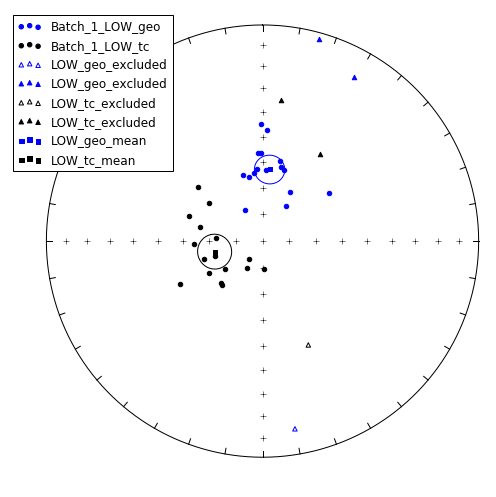

In [55]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di(dec_l_geo,inc_l_geo,color='blue',label='Batch_1_LOW_geo')
ipmag.plot_di(dec_l_tc,inc_l_tc,color='k',label='Batch_1_LOW_tc')
ipmag.plot_di(b1_low_geo_excl_dec,b1_low_geo_excl_inc,color='blue',marker='^',label='LOW_geo_excluded')
ipmag.plot_di(b1_low_tc_excl_dec,b1_low_tc_excl_inc,color='k',marker='^',label='LOW_tc_excluded')
ipmag.plot_di_mean(low_geo_mean['dec'],low_geo_mean['inc'],
                  low_geo_mean["alpha95"],color='b',marker='s',
                  label='LOW_geo_mean')
ipmag.plot_di_mean(low_tc_mean['dec'],low_tc_mean['inc'],
                  low_tc_mean["alpha95"],color='k',marker='s',
                  label='LOW_tc_mean')

plt.legend(loc=(-.05,.65))
plt.savefig('./notebook_output/Zav_sites_PLF.pdf',bbox_inches='tight')
plt.show()

In [9]:
teel_site_bedding = pd.read_csv('../Code/tables/site_tilt_corrections.txt',sep='\t',header=0,index_col=0)
#also eliminate sites from bedding orientation table for use in tilt/fold test
teel_site_bedding_edit = teel_site_bedding
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z44']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z45']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z50']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z56']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z57']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z58']


# mag_boot_list =[]
# for i in range(len(teel_prim_mag_geo_vgps)):
#     dec_g,inc_g,dip_dir,dip=teel_prim_mag_geo_vgps['dec_geo'][i],teel_prim_mag_geo_vgps['inc_geo'][i],teel_site_bedding_edit['sample_bed_dip_direction'][i],teel_site_bedding_edit['sample_bed_dip'][i]
#     mag_boot_list.append([dec_g,inc_g,dip_dir,dip])
# mag_boot_data = np.array(mag_boot_list)
# #save bootstrap file for command line fold test figure output
# np.savetxt('./notebook_output/mag_boot_data.txt',mag_boot_data,fmt='%.2f',delimiter=' ')
# ipmag.bootstrap_fold_test(mag_boot_data,num_sims=1000,min_untilt=-10,max_untilt=120,ninety_nine=True)

## Magnetite components - typically temperatures >500ºC

In [10]:
Zavkhan_b1_mag = Zavkhan_b1_site_means[Zavkhan_b1_site_means['site_comp_name'] == 'MAG']
b1_mag_geo = Zavkhan_b1_mag[Zavkhan_b1_mag['site_tilt_correction'] == 0]
b1_mag_tc = Zavkhan_b1_mag[Zavkhan_b1_mag['site_tilt_correction'] == 100]

# eliminate site means that have large a95 or and statistically meaningless
# b1_mag_geo_edit = b1_mag_geo[(b1_mag_geo.site_comp_name != 'MAG') | (b1_mag_geo.er_site_name !='Z64')]
# b1_mag_tc_edit = b1_mag_tc[(b1_mag_tc.site_comp_name != 'MAG') | (b1_mag_tc.er_site_name !='Z64')]
b1_mag_geo_edit = b1_mag_geo[(b1_mag_geo.site_comp_name != 'MAG') | (b1_mag_geo.er_site_name !='Z74')]
b1_mag_tc_edit = b1_mag_tc[(b1_mag_tc.site_comp_name != 'MAG') | (b1_mag_tc.er_site_name !='Z74')]
b1_mag_geo_edit = b1_mag_geo_edit[(b1_mag_geo_edit.site_comp_name != 'MAG') | (b1_mag_geo_edit.er_site_name !='Z77')]
b1_mag_tc_edit = b1_mag_tc_edit[(b1_mag_tc_edit.site_comp_name != 'MAG') | (b1_mag_tc_edit.er_site_name !='Z77')]
b1_mag_geo_edit = b1_mag_geo_edit[(b1_mag_geo_edit.site_comp_name != 'MAG') | (b1_mag_geo_edit.er_site_name !='Z82')]
b1_mag_tc_edit = b1_mag_tc_edit[(b1_mag_tc_edit.site_comp_name != 'MAG') | (b1_mag_tc_edit.er_site_name !='Z82')]
b1_mag_geo_edit = b1_mag_geo_edit[(b1_mag_geo_edit.site_comp_name != 'MAG') | (b1_mag_geo_edit.er_site_name !='Z85')]
b1_mag_tc_edit = b1_mag_tc_edit[(b1_mag_tc_edit.site_comp_name != 'MAG') | (b1_mag_tc_edit.er_site_name !='Z85')]
b1_mag_geo_edit = b1_mag_geo_edit[(b1_mag_geo_edit.site_comp_name != 'MAG') | (b1_mag_geo_edit.er_site_name !='Z89')]
b1_mag_tc_edit = b1_mag_tc_edit[(b1_mag_tc_edit.site_comp_name != 'MAG') | (b1_mag_tc_edit.er_site_name !='Z89')]
b1_mag_geo_edit = b1_mag_geo_edit[(b1_mag_geo_edit.site_comp_name != 'MAG') | (b1_mag_geo_edit.er_site_name !='Z90')]
b1_mag_tc_edit = b1_mag_tc_edit[(b1_mag_tc_edit.site_comp_name != 'MAG') | (b1_mag_tc_edit.er_site_name !='Z90')]

# make table (array, rather) to plot excluded data points with crosses through them
# in both geographic...
b1_mag_geo_excl_dec,b1_mag_tc_excl_dec,b1_mag_geo_excl_inc,b1_mag_tc_excl_inc = [],[],[],[]
# b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z64'],1))
# b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z64'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z74'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z74'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z77'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z77'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z82'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z82'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z85'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z85'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z89'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z89'],1))
b1_mag_geo_excl_dec.append(round(b1_mag_geo.site_dec[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name=='Z90'],1))
b1_mag_geo_excl_inc.append(round(b1_mag_geo.site_inc[b1_mag_geo.site_comp_name=='MAG'][b1_mag_geo.er_site_name== 'Z90'],1))
# ...and tilt-corrected coordinates
# b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z64'],1))
# b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z64'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z74'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z74'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z77'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z77'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z82'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z82'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z85'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z85'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z89'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z89'],1))
b1_mag_tc_excl_dec.append(round(b1_mag_tc.site_dec[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z90'],1))
b1_mag_tc_excl_inc.append(round(b1_mag_tc.site_inc[b1_mag_tc.site_comp_name=='MAG'][b1_mag_tc.er_site_name== 'Z90'],1))

# reset index values - not sure if this is actually necessary since there are no iterations, as of yet...
b1_mag_tc.reset_index(inplace=True)
b1_mag_geo.reset_index(inplace=True)
b1_mag_tc_edit.reset_index(inplace=True)
b1_mag_geo_edit.reset_index(inplace=True)

dec_mag_geo,inc_mag_geo,dec_mag_tc,inc_mag_tc = [],[],[],[]
dec_mag_geo,inc_mag_geo = list(b1_mag_geo_edit['site_dec'].values),list(b1_mag_geo_edit['site_inc'].values)
dec_mag_tc,inc_mag_tc = list(b1_mag_tc_edit['site_dec'].values),list(b1_mag_tc_edit['site_inc'].values)
# MANUALLY flip three sites, create new dataframe, with opposite polarity Z64, Z73, and Z84 for mean calculation
b1_mag_geo_edit.set_value(1,'site_dec',110.8) # each uses index and replaces values manually
b1_mag_geo_edit.set_value(1,'site_inc',-42.4) # CHECK IF ANY CHANGES ARE MADE TO SITE MEAN DIRECTIONS
b1_mag_geo_edit.set_value(6,'site_dec',31.3)
b1_mag_geo_edit.set_value(6,'site_inc',-70.8)
b1_mag_geo_edit.set_value(13,'site_dec',98.3)
b1_mag_geo_edit.set_value(13,'site_inc',-51.4)
b1_mag_tc_edit.set_value(1,'site_dec',82.6)
b1_mag_tc_edit.set_value(1,'site_inc',-32.7)
b1_mag_tc_edit.set_value(6,'site_dec',36.7)
b1_mag_tc_edit.set_value(6,'site_inc',-32.7)
b1_mag_tc_edit.set_value(13,'site_dec',65.1)
b1_mag_tc_edit.set_value(13,'site_inc',-31.2)
# regenerate lists of edited directions in geo/tc
dec_mag_geo_f,inc_mag_geo_f = list(b1_mag_geo_edit['site_dec'].values),list(b1_mag_geo_edit['site_inc'].values)
dec_mag_tc_f,inc_mag_tc_f = list(b1_mag_tc_edit['site_dec'].values),list(b1_mag_tc_edit['site_inc'].values)

mag_geo_dir = ipmag.make_di_block(dec_mag_geo_f,inc_mag_geo_f) # make unit vectors for pmag.fisher_mean()
mag_tc_dir = ipmag.make_di_block(dec_mag_tc_f,inc_mag_tc_f)
mag_geo_mean=pmag.fisher_mean(mag_geo_dir) # calc means
mag_tc_mean=pmag.fisher_mean(mag_tc_dir)

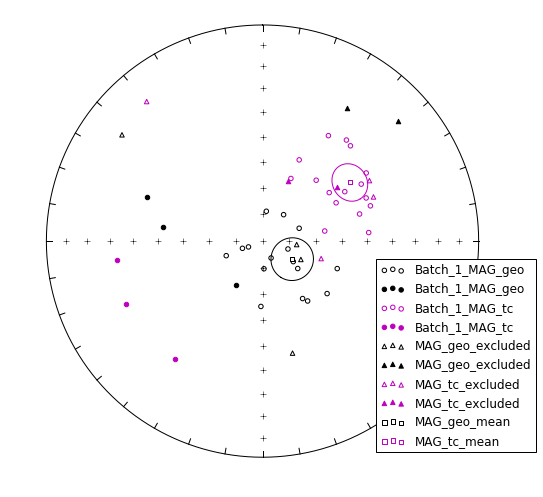

In [54]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di(dec_mag_geo,inc_mag_geo,color='k',label='Batch_1_MAG_geo')
ipmag.plot_di(dec_mag_tc,inc_mag_tc,color='m',label='Batch_1_MAG_tc')
ipmag.plot_di(b1_mag_geo_excl_dec,b1_mag_geo_excl_inc,color='k',marker='^',label='MAG_geo_excluded')
ipmag.plot_di(b1_mag_tc_excl_dec,b1_mag_tc_excl_inc,color='m',marker='^',label='MAG_tc_excluded')
ipmag.plot_di_mean(mag_geo_mean['dec'],mag_geo_mean['inc'],
                  mag_geo_mean["alpha95"],color='k',marker='s',
                  label='MAG_geo_mean')
ipmag.plot_di_mean(mag_tc_mean['dec'],mag_tc_mean['inc'],
                  mag_tc_mean["alpha95"],color='m',marker='s',
                  label='MAG_tc_mean')

plt.legend(loc=(0.75,.05))
plt.savefig('./notebook_output/Zav_sites_MAG.pdf',bbox_inches='tight')
plt.show()

doing  200  iterations...please be patient.....


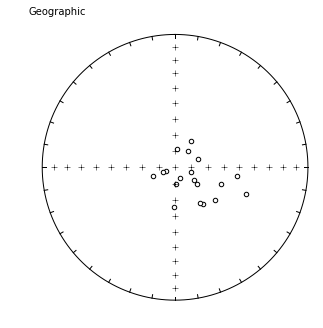

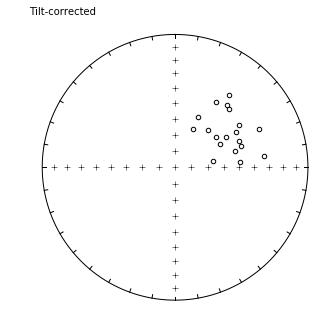

tightest grouping of vectors obtained at (95% confidence bounds):
65 - 159 percent unfolding
range of all bootstrap samples: 
0  -  159 percent unfolding


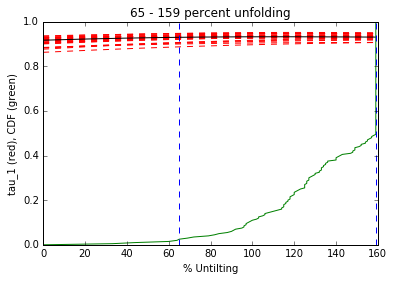

In [57]:
#also eliminate sites from bedding orientation table for use in tilt/fold test
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z74']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z77']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z82']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z85']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z89']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z90']
# also eliminate sites that never had magnetite components
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z66']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z91']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z92']
Zav_batch_one_site_bedding_edit.reset_index(inplace=True)

mag_boot_list =[]
for i in range(len(b1_mag_geo_edit)):
    dec_g,inc_g,dip_dir,dip=b1_mag_geo_edit['site_dec'][i],b1_mag_geo_edit['site_inc'][i],Zav_batch_one_site_bedding_edit['sample_bed_dip_direction'][i],Zav_batch_one_site_bedding_edit['sample_bed_dip'][i]
    mag_boot_list.append([dec_g,inc_g,dip_dir,dip])
mag_boot_data = np.array(mag_boot_list)
#save bootstrap file for command line fold test figure output
np.savetxt('./notebook_output/mag_boot_data.txt',mag_boot_data,fmt='%.2f',delimiter=' ')
ipmag.bootstrap_fold_test(mag_boot_data,num_sims=200,min_untilt=0,max_untilt=160)

## Hematite components - temperature >585ºC 

In [12]:
Zavkhan_b1_hem = Zavkhan_b1_site_means[Zavkhan_b1_site_means['site_comp_name'] == 'HEM']
b1_hem_geo = Zavkhan_b1_hem[Zavkhan_b1_hem['site_tilt_correction'] == 0]
b1_hem_tc = Zavkhan_b1_hem[Zavkhan_b1_hem['site_tilt_correction'] == 100]

# eliminate site means that have large a95 or are statistically meaningless
b1_hem_geo_edit = b1_hem_geo[(b1_hem_geo.site_comp_name != 'HEM') | (b1_hem_geo.er_site_name !='Z72')]
b1_hem_tc_edit = b1_hem_tc[(b1_hem_tc.site_comp_name != 'HEM') | (b1_hem_tc.er_site_name !='Z72')]
b1_hem_geo_edit = b1_hem_geo_edit[(b1_hem_geo_edit.site_comp_name != 'HEM') | (b1_hem_geo_edit.er_site_name !='Z76')]
b1_hem_tc_edit = b1_hem_tc_edit[(b1_hem_tc_edit.site_comp_name != 'HEM') | (b1_hem_tc_edit.er_site_name !='Z76')]
b1_hem_geo_edit = b1_hem_geo_edit[(b1_hem_geo_edit.site_comp_name != 'HEM') | (b1_hem_geo_edit.er_site_name !='Z77')]
b1_hem_tc_edit = b1_hem_tc_edit[(b1_hem_tc_edit.site_comp_name != 'HEM') | (b1_hem_tc_edit.er_site_name !='Z77')]
b1_hem_geo_edit = b1_hem_geo_edit[(b1_hem_geo_edit.site_comp_name != 'HEM') | (b1_hem_geo_edit.er_site_name !='Z78')]
b1_hem_tc_edit = b1_hem_tc_edit[(b1_hem_tc_edit.site_comp_name != 'HEM') | (b1_hem_tc_edit.er_site_name !='Z78')]

# make table (array, rather) to plot excluded data points with crosses through them
# in both geographic...
b1_hem_geo_excl_dec,b1_hem_tc_excl_dec,b1_hem_geo_excl_inc,b1_hem_tc_excl_inc = [],[],[],[]
b1_hem_geo_excl_dec.append(round(b1_hem_geo.site_dec[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name=='Z72'],1))
b1_hem_geo_excl_inc.append(round(b1_hem_geo.site_inc[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name== 'Z72'],1))
b1_hem_geo_excl_dec.append(round(b1_hem_geo.site_dec[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name=='Z76'],1))
b1_hem_geo_excl_inc.append(round(b1_hem_geo.site_inc[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name== 'Z76'],1))
b1_hem_geo_excl_dec.append(round(b1_hem_geo.site_dec[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name=='Z77'],1))
b1_hem_geo_excl_inc.append(round(b1_hem_geo.site_inc[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name== 'Z77'],1))
b1_hem_geo_excl_dec.append(round(b1_hem_geo.site_dec[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name=='Z78'],1))
b1_hem_geo_excl_inc.append(round(b1_hem_geo.site_inc[b1_hem_geo.site_comp_name=='HEM'][b1_hem_geo.er_site_name== 'Z78'],1))
# ...and tilt-corrected coordinates
b1_hem_tc_excl_dec.append(round(b1_hem_tc.site_dec[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z72'],1))
b1_hem_tc_excl_inc.append(round(b1_hem_tc.site_inc[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z72'],1))
b1_hem_tc_excl_dec.append(round(b1_hem_tc.site_dec[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z76'],1))
b1_hem_tc_excl_inc.append(round(b1_hem_tc.site_inc[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z76'],1))
b1_hem_tc_excl_dec.append(round(b1_hem_tc.site_dec[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z77'],1))
b1_hem_tc_excl_inc.append(round(b1_hem_tc.site_inc[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z77'],1))
b1_hem_tc_excl_dec.append(round(b1_hem_tc.site_dec[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z78'],1))
b1_hem_tc_excl_inc.append(round(b1_hem_tc.site_inc[b1_hem_tc.site_comp_name=='HEM'][b1_hem_tc.er_site_name== 'Z78'],1))

# reset index values - not sure if this is actually necessary since there are no iterations, as of yet...
b1_hem_tc.reset_index(inplace=True)
b1_hem_geo.reset_index(inplace=True)
b1_hem_tc_edit.reset_index(inplace=True)
b1_hem_geo_edit.reset_index(inplace=True)

dec_hem_geo,inc_hem_geo,dec_hem_tc,inc_hem_tc = [],[],[],[]
dec_hem_geo,inc_hem_geo = list(b1_hem_geo_edit['site_dec'].values),list(b1_hem_geo_edit['site_inc'].values)
dec_hem_tc,inc_hem_tc = list(b1_hem_tc_edit['site_dec'].values),list(b1_hem_tc_edit['site_inc'].values)
# MANUALLY flip three sites, create new dataframe, with opposite polarity Z64 for mean calculation
b1_hem_geo_edit.set_value(0,'site_dec',108.0) # uses index and replaces values manually
b1_hem_geo_edit.set_value(0,'site_inc',-47.0) # CHECK IF ANY CHANGES ARE MADE TO SITE MEAN DIRECTION
b1_hem_tc_edit.set_value(0,'site_dec',77.0)
b1_hem_tc_edit.set_value(0,'site_inc',-34.6)
# regenerate lists of edited directions in geo/tc
dec_hem_geo_f,inc_hem_geo_f = list(b1_hem_geo_edit['site_dec'].values),list(b1_hem_geo_edit['site_inc'].values)
dec_hem_tc_f,inc_hem_tc_f = list(b1_hem_tc_edit['site_dec'].values),list(b1_hem_tc_edit['site_inc'].values)

hem_geo_dir = ipmag.make_di_block(dec_hem_geo_f,inc_hem_geo_f) # make unit vectors for pmag.fisher_mean()
hem_tc_dir = ipmag.make_di_block(dec_hem_tc_f,inc_hem_tc_f)
hem_geo_mean=pmag.fisher_mean(hem_geo_dir) # calc means
hem_tc_mean=pmag.fisher_mean(hem_tc_dir)

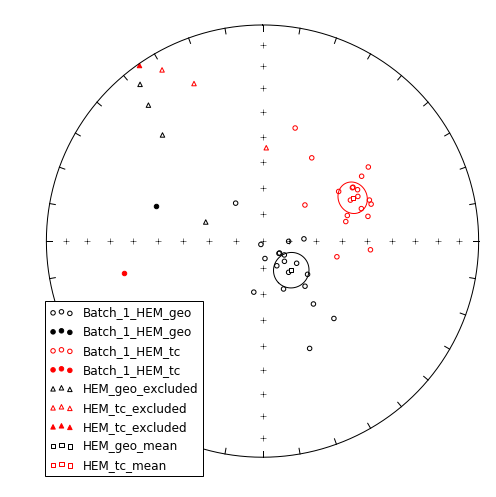

In [53]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di(dec_hem_geo,inc_hem_geo,color='k',label='Batch_1_HEM_geo')
ipmag.plot_di(dec_hem_tc,inc_hem_tc,color='r',label='Batch_1_HEM_tc')
ipmag.plot_di(b1_hem_geo_excl_dec,b1_hem_geo_excl_inc,color='k',marker='^',label='HEM_geo_excluded')
ipmag.plot_di(b1_hem_tc_excl_dec,b1_hem_tc_excl_inc,color='r',marker='^',label='HEM_tc_excluded')
ipmag.plot_di_mean(hem_geo_mean['dec'],hem_geo_mean['inc'],
                  hem_geo_mean["alpha95"],color='k',marker='s',
                  label='HEM_geo_mean')
ipmag.plot_di_mean(hem_tc_mean['dec'],hem_tc_mean['inc'],
                  hem_tc_mean["alpha95"],color='r',marker='s',
                  label='HEM_tc_mean')

plt.legend(loc=(0.02,0.0))
plt.savefig('./notebook_output/Zav_sites_HEM.pdf',bbox_inches='tight')
plt.show()

doing  1000  iterations...please be patient.....


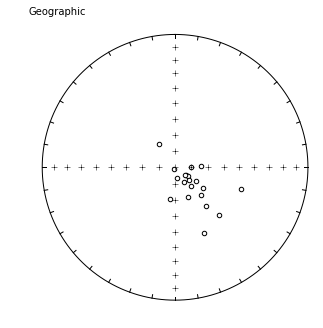

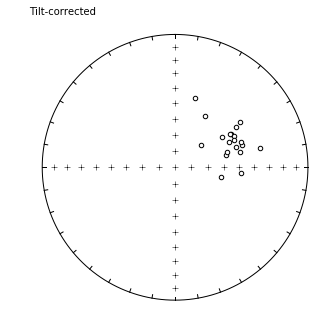

tightest grouping of vectors obtained at (95% confidence bounds):
31 - 139 percent unfolding
range of all bootstrap samples: 
0  -  139 percent unfolding


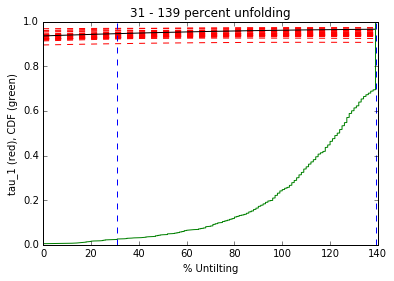

In [66]:
#also eliminate sites from bedding orientation table for use in tilt/fold test
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z72']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z76']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z77']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z78']
# also eliminate sites that never had magnetite components
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z59']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z73']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z84']
Zav_batch_one_site_bedding_edit = Zav_batch_one_site_bedding_edit[Zav_batch_one_site_bedding_edit.index !='Z85']
Zav_batch_one_site_bedding_edit.reset_index(inplace=True)

hem_boot_list =[]
for i in range(len(b1_hem_geo_edit)):
    dec_g,inc_g,dip_dir,dip=b1_hem_geo_edit['site_dec'][i],b1_hem_geo_edit['site_inc'][i],Zav_batch_one_site_bedding_edit['sample_bed_dip_direction'][i],Zav_batch_one_site_bedding_edit['sample_bed_dip'][i]
    hem_boot_list.append([dec_g,inc_g,dip_dir,dip])
hem_boot_data = np.array(hem_boot_list)
#save bootstrap file for command line fold test figure output
np.savetxt('./notebook_output/hem_boot_data.txt',hem_boot_data,fmt='%.2f',delimiter=' ')
ipmag.bootstrap_fold_test(hem_boot_data,num_sims=1000,min_untilt=0,max_untilt=140)

## Mid thermal components - typically, temperatures between 150-425ºC

In [14]:
Zavkhan_b1_mid = Zavkhan_b1_site_means[Zavkhan_b1_site_means['site_comp_name'] == 'MID']
b1_mid_geo = Zavkhan_b1_mid[Zavkhan_b1_mid['site_tilt_correction'] == 0]
b1_mid_tc = Zavkhan_b1_mid[Zavkhan_b1_mid['site_tilt_correction'] == 100]

# eliminate site means that have large a95 or are statistically meaningless
b1_mid_geo_edit = b1_mid_geo[(b1_mid_geo.site_comp_name != 'MID') | (b1_mid_geo.er_site_name !='Z70')]
b1_mid_tc_edit = b1_mid_tc[(b1_mid_tc.site_comp_name != 'MID') | (b1_mid_tc.er_site_name !='Z70')]
b1_mid_geo_edit = b1_mid_geo_edit[(b1_mid_geo_edit.site_comp_name != 'MID') | (b1_mid_geo_edit.er_site_name !='Z76')]
b1_mid_tc_edit = b1_mid_tc_edit[(b1_mid_tc_edit.site_comp_name != 'MID') | (b1_mid_tc_edit.er_site_name !='Z76')]
b1_mid_geo_edit = b1_mid_geo_edit[(b1_mid_geo_edit.site_comp_name != 'MID') | (b1_mid_geo_edit.er_site_name !='Z78')]
b1_mid_tc_edit = b1_mid_tc_edit[(b1_mid_tc_edit.site_comp_name != 'MID') | (b1_mid_tc_edit.er_site_name !='Z78')]
b1_mid_geo_edit = b1_mid_geo_edit[(b1_mid_geo_edit.site_comp_name != 'MID') | (b1_mid_geo_edit.er_site_name !='Z87')]
b1_mid_tc_edit = b1_mid_tc_edit[(b1_mid_tc_edit.site_comp_name != 'MID') | (b1_mid_tc_edit.er_site_name !='Z87')]
b1_mid_geo_edit = b1_mid_geo_edit[(b1_mid_geo_edit.site_comp_name != 'MID') | (b1_mid_geo_edit.er_site_name !='Z89')]
b1_mid_tc_edit = b1_mid_tc_edit[(b1_mid_tc_edit.site_comp_name != 'MID') | (b1_mid_tc_edit.er_site_name !='Z89')]
b1_mid_geo_edit = b1_mid_geo_edit[(b1_mid_geo_edit.site_comp_name != 'MID') | (b1_mid_geo_edit.er_site_name !='Z91')]
b1_mid_tc_edit = b1_mid_tc_edit[(b1_mid_tc_edit.site_comp_name != 'MID') | (b1_mid_tc_edit.er_site_name !='Z91')]

# make table (array, rather) to plot excluded data points with crosses through them
# in both geographic...
b1_mid_geo_excl_dec,b1_mid_tc_excl_dec,b1_mid_geo_excl_inc,b1_mid_tc_excl_inc = [],[],[],[]
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z70'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z70'],1))
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z76'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z76'],1))
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z78'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z78'],1))
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z87'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z87'],1))
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z89'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z89'],1))
b1_mid_geo_excl_dec.append(round(b1_mid_geo.site_dec[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name=='Z91'],1))
b1_mid_geo_excl_inc.append(round(b1_mid_geo.site_inc[b1_mid_geo.site_comp_name=='MID'][b1_mid_geo.er_site_name== 'Z91'],1))
# ...and tilt-corrected coordinates
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z70'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z70'],1))
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z76'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z76'],1))
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z78'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z78'],1))
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z87'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z87'],1))
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z89'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z89'],1))
b1_mid_tc_excl_dec.append(round(b1_mid_tc.site_dec[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z91'],1))
b1_mid_tc_excl_inc.append(round(b1_mid_tc.site_inc[b1_mid_tc.site_comp_name=='MID'][b1_mid_tc.er_site_name== 'Z91'],1))

b1_mid_tc.reset_index(inplace=True)
b1_mid_geo.reset_index(inplace=True)
b1_mid_tc_edit.reset_index(inplace=True)
b1_mid_geo_edit.reset_index(inplace=True)

dec_mid_geo,inc_mid_geo = list(b1_mid_geo_edit['site_dec'].values),list(b1_mid_geo_edit['site_inc'].values)
dec_mid_tc,inc_mid_tc = list(b1_mid_tc_edit['site_dec'].values),list(b1_mid_tc_edit['site_inc'].values)
mid_geo_dir = ipmag.make_di_block(dec_mid_geo,inc_mid_geo) # make unit vectors for pmag.fisher_mean()
mid_tc_dir = ipmag.make_di_block(dec_mid_tc,inc_mid_tc)
mid_geo_mean=pmag.fisher_mean(mid_geo_dir) # calc means
mid_tc_mean=pmag.fisher_mean(mid_tc_dir)

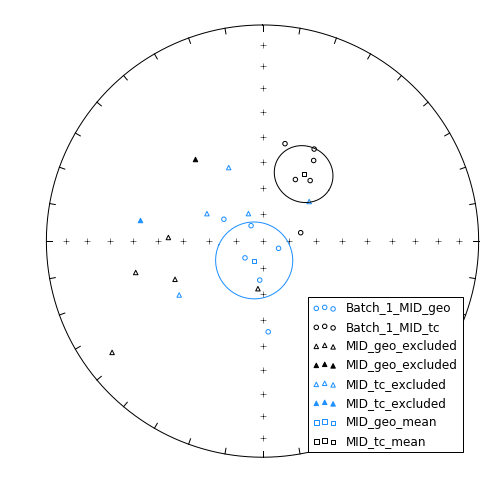

In [52]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di(dec_mid_geo,inc_mid_geo,color='dodgerblue',label='Batch_1_MID_geo')
ipmag.plot_di(dec_mid_tc,inc_mid_tc,color='k',label='Batch_1_MID_tc')
ipmag.plot_di(b1_mid_geo_excl_dec,b1_mid_geo_excl_inc,color='k',marker='^',label='MID_geo_excluded')
ipmag.plot_di(b1_mid_tc_excl_dec,b1_mid_tc_excl_inc,color='dodgerblue',marker='^',label='MID_tc_excluded')
ipmag.plot_di_mean(mid_geo_mean['dec'],mid_geo_mean['inc'],
                  mid_geo_mean["alpha95"],color='dodgerblue',marker='s',
                  label='MID_geo_mean')
ipmag.plot_di_mean(mid_tc_mean['dec'],mid_tc_mean['inc'],
                  mid_tc_mean["alpha95"],color='k',marker='s',
                  label='MID_tc_mean')

plt.legend(loc=(.6,.05))
plt.savefig('./notebook_output/Zav_sites_MID.pdf',bbox_inches='tight')
plt.show()

## Plot all mean directions

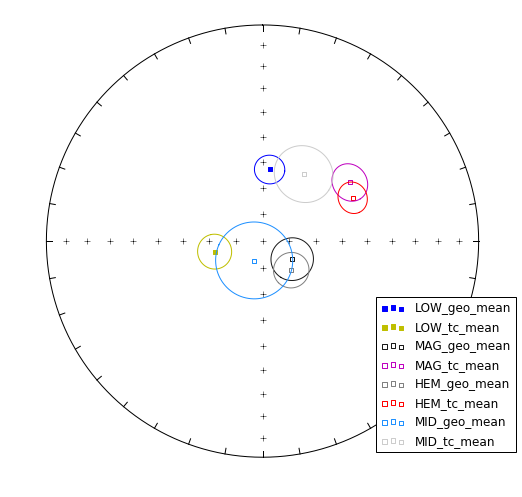

In [39]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di_mean(low_geo_mean['dec'],low_geo_mean['inc'],
                  low_geo_mean["alpha95"],color='b',marker='s',
                  label='LOW_geo_mean')
ipmag.plot_di_mean(low_tc_mean['dec'],low_tc_mean['inc'],
                  low_tc_mean["alpha95"],color='y',marker='s',
                  label='LOW_tc_mean')
ipmag.plot_di_mean(mag_geo_mean['dec'],mag_geo_mean['inc'],
                  mag_geo_mean["alpha95"],color='0.1',marker='s',
                  label='MAG_geo_mean')
ipmag.plot_di_mean(mag_tc_mean['dec'],mag_tc_mean['inc'],
                  mag_tc_mean["alpha95"],color='m',marker='s',
                  label='MAG_tc_mean')
ipmag.plot_di_mean(hem_geo_mean['dec'],hem_geo_mean['inc'],
                  hem_geo_mean["alpha95"],color='0.5',marker='s',
                  label='HEM_geo_mean')
ipmag.plot_di_mean(hem_tc_mean['dec'],hem_tc_mean['inc'],
                  hem_tc_mean["alpha95"],color='r',marker='s',
                  label='HEM_tc_mean')
ipmag.plot_di_mean(mid_geo_mean['dec'],mid_geo_mean['inc'],
                  mid_geo_mean["alpha95"],color='dodgerblue',marker='s',
                  label='MID_geo_mean')
ipmag.plot_di_mean(mid_tc_mean['dec'],mid_tc_mean['inc'],
                  mid_tc_mean["alpha95"],color='0.8',marker='s',
                  label='MID_tc_mean')

plt.legend(loc=(0.75,.05))
plt.show()

These directions are compared to other data from the region from rocks of similar age and younger.

In [21]:
Zav_overprints=pd.read_csv('../Code/tables/Zavkhan_ovprts.csv')
Zav_overprints
# Notes: B-G = Bayan-Gol; T-O = Tsagan-Olom

,ID,N,k_geo,Dec_geo,Inc_geo,a95_geo,k_tc,Dec_tc,Inc_tc,a95_tc,comments
0,Lev10-INT,18,19.0,272.8,-66.2,8.2,3.0,158.7,-42.8,24.7,NaN
1,Lev10-HT,11,3.0,311.7,-11.0,30.1,19.0,321.9,-65.0,10.7,NaN
2,Lev11-INT,27,14.0,207.9,-30.6,7.8,6.0,210.4,-4.0,12.4,NaN
3,Lev11-HT,18,10.0,194.2,29.2,11.5,41.0,179.6,53.7,5.4,NaN
4,Krav01-LOW,10,59.7,4.1,70.9,6.3,96.8,181.2,85.6,4.9,data from both B-G and T-O
5,Krav01-INT,9,31.3,209.2,-66.0,9.3,117.6,284.3,-79.7,4.8,data from both B-G and T-O
6,Krav01-HT,6,14.9,118.5,5.3,17.9,13.3,118.3,-6.3,19.0,data from B-G
7,Evans_HT,193,NaN,NaN,NaN,NaN,5.8,331.9,-62.6,4.6,NaN
8,Z09_cgl_INT,20,32.3,200.7,-62.2,5.8,32.3,212.3,-5.8,5.8,NaN
9,Z104_cgl_INT,31,165.4,174.8,-61.7,2.0,165.2,61.9,-71.4,2.0,NaN


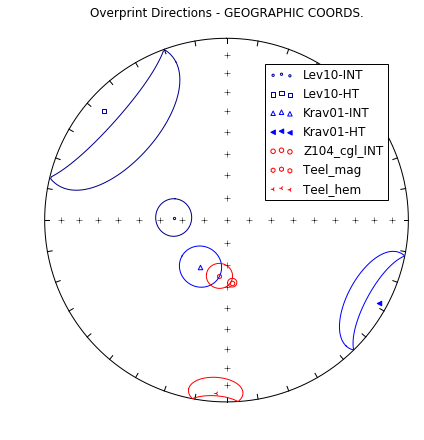

In [31]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][0],Zav_overprints['Inc_geo'][0],Zav_overprints['a95_geo'][0],
                       color='darkblue',marker='.',label='%s' %Zav_overprints['ID'][0])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][1],Zav_overprints['Inc_geo'][1],Zav_overprints['a95_geo'][1],
                       color='darkblue',marker='s',label='%s' %Zav_overprints['ID'][1])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][5],Zav_overprints['Inc_geo'][5],Zav_overprints['a95_geo'][5],
                       color='b',marker='^',label='%s' %Zav_overprints['ID'][5])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][6],Zav_overprints['Inc_geo'][6],Zav_overprints['a95_geo'][6],
                       color='b',marker='<',label='%s' %Zav_overprints['ID'][6])
# ipmag.plot_di_mean(Zav_overprints['Dec_geo'][7],Zav_overprints['Inc_geo'][7],Zav_overprints['a95_geo'][7],
#                        color='r',marker='>',label='%s' %Zav_overprints['ID'][7])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][9],Zav_overprints['Inc_geo'][9],Zav_overprints['a95_geo'][9],
                       color='r',marker='o',label='%s' %Zav_overprints['ID'][9])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][10],Zav_overprints['Inc_geo'][10],Zav_overprints['a95_geo'][10],
                       color='r',marker='h',label='%s' %Zav_overprints['ID'][10])
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][11],Zav_overprints['Inc_geo'][11],Zav_overprints['a95_geo'][11],
                       color='r',marker='3',label='%s' %Zav_overprints['ID'][11])

plt.title('Overprint Directions - GEOGRAPHIC COORDS.')
plt.legend(loc=(0.6,0.55))
#plt.savefig('./notebook_output/Overprints_geo.pdf')
plt.show()

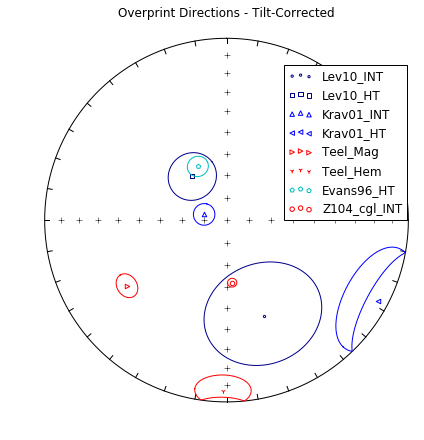

In [35]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][0],Zav_overprints['Inc_tc'][0],Zav_overprints['a95_tc'][0],
                       color='darkblue',marker='.',label='Lev10_INT')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][1],Zav_overprints['Inc_tc'][1],Zav_overprints['a95_tc'][1],
                       color='darkblue',marker='s',label='Lev10_HT')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][5],Zav_overprints['Inc_tc'][5],Zav_overprints['a95_tc'][5],
                       color='b',marker='^',label='Krav01_INT')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][6],Zav_overprints['Inc_tc'][6],Zav_overprints['a95_tc'][6],
                       color='b',marker='<',label='Krav01_HT')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][10],Zav_overprints['Inc_tc'][10],Zav_overprints['a95_tc'][10],
                       color='r',marker='>',label='Teel_Mag')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][11],Zav_overprints['Inc_tc'][11],Zav_overprints['a95_tc'][11],
                       color='r',marker='1',label='Teel_Hem')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][7],Zav_overprints['Inc_tc'][7],Zav_overprints['a95_tc'][7],
                       color='c',marker='p',label='Evans96_HT')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][9],Zav_overprints['Inc_geo'][9],Zav_overprints['a95_geo'][9],
                       color='r',marker='o',label='%s' %Zav_overprints['ID'][9])

plt.title('Overprint Directions - Tilt-Corrected')
plt.legend(loc=(0.65,0.5))
plt.savefig('./notebook_output/Overprints_TC.pdf')
plt.show()

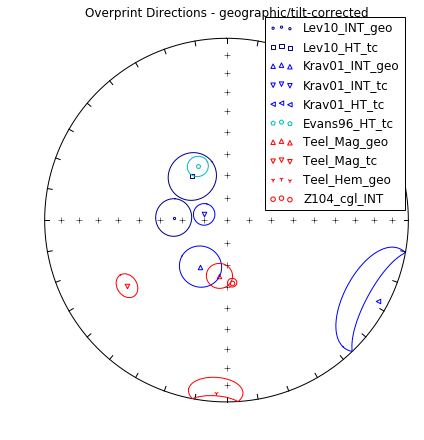

In [38]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][0],Zav_overprints['Inc_geo'][0],Zav_overprints['a95_geo'][0],
                       color='darkblue',marker='.',label='Lev10_INT_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][1],Zav_overprints['Inc_tc'][1],Zav_overprints['a95_tc'][1],
                       color='darkblue',marker='s',label='Lev10_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][5],Zav_overprints['Inc_geo'][5],Zav_overprints['a95_geo'][5],
                       color='b',marker='^',label='Krav01_INT_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][5],Zav_overprints['Inc_tc'][5],Zav_overprints['a95_tc'][5],
                       color='b',marker='v',label='Krav01_INT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][6],Zav_overprints['Inc_tc'][6],Zav_overprints['a95_tc'][6],
                       color='b',marker='<',label='Krav01_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][7],Zav_overprints['Inc_tc'][7],Zav_overprints['a95_tc'][7],
                       color='c',marker='p',label='Evans96_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][10],Zav_overprints['Inc_geo'][10],Zav_overprints['a95_geo'][10],
                       color='r',marker='^',label='Teel_Mag_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][10],Zav_overprints['Inc_tc'][10],Zav_overprints['a95_tc'][10],
                       color='r',marker='v',label='Teel_Mag_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][11],Zav_overprints['Inc_geo'][11],Zav_overprints['a95_geo'][11],
                       color='r',marker='1',label='Teel_Hem_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][9],Zav_overprints['Inc_geo'][9],Zav_overprints['a95_geo'][9],
                       color='r',marker='o',label='%s' %Zav_overprints['ID'][9])

plt.title('Overprint Directions - geographic/tilt-corrected')
plt.legend(loc=(0.6,0.525))
plt.savefig('./notebook_output/Overprints_geo-tc.pdf')
plt.show()

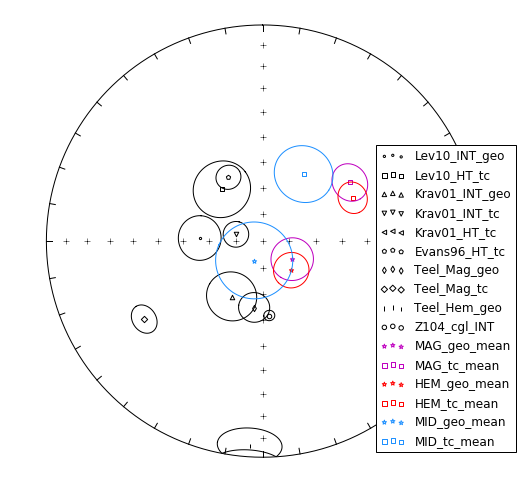

In [45]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][0],Zav_overprints['Inc_geo'][0],Zav_overprints['a95_geo'][0],
                       color='k',marker='.',label='Lev10_INT_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][1],Zav_overprints['Inc_tc'][1],Zav_overprints['a95_tc'][1],
                       color='k',marker='s',label='Lev10_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][5],Zav_overprints['Inc_geo'][5],Zav_overprints['a95_geo'][5],
                       color='k',marker='^',label='Krav01_INT_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][5],Zav_overprints['Inc_tc'][5],Zav_overprints['a95_tc'][5],
                       color='k',marker='v',label='Krav01_INT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][6],Zav_overprints['Inc_tc'][6],Zav_overprints['a95_tc'][6],
                       color='k',marker='<',label='Krav01_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][7],Zav_overprints['Inc_tc'][7],Zav_overprints['a95_tc'][7],
                       color='k',marker='p',label='Evans96_HT_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][10],Zav_overprints['Inc_geo'][10],Zav_overprints['a95_geo'][10],
                       color='k',marker='d',label='Teel_Mag_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_tc'][10],Zav_overprints['Inc_tc'][10],Zav_overprints['a95_tc'][10],
                       color='k',marker='D',label='Teel_Mag_tc')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][11],Zav_overprints['Inc_geo'][11],Zav_overprints['a95_geo'][11],
                       color='k',marker='|',label='Teel_Hem_geo')
ipmag.plot_di_mean(Zav_overprints['Dec_geo'][9],Zav_overprints['Inc_geo'][9],Zav_overprints['a95_geo'][9],
                       color='k',marker='o',label='%s' %Zav_overprints['ID'][9])

ipmag.plot_di_mean(mag_geo_mean['dec'],mag_geo_mean['inc'],
                  mag_geo_mean["alpha95"],color='m',marker='*',
                  label='MAG_geo_mean')
ipmag.plot_di_mean(mag_tc_mean['dec'],mag_tc_mean['inc'],
                  mag_tc_mean["alpha95"],color='m',marker='s',
                  label='MAG_tc_mean')
ipmag.plot_di_mean(hem_geo_mean['dec'],hem_geo_mean['inc'],
                  hem_geo_mean["alpha95"],color='r',marker='*',
                  label='HEM_geo_mean')
ipmag.plot_di_mean(hem_tc_mean['dec'],hem_tc_mean['inc'],
                  hem_tc_mean["alpha95"],color='r',marker='s',
                  label='HEM_tc_mean')
ipmag.plot_di_mean(mid_geo_mean['dec'],mid_geo_mean['inc'],
                  mid_geo_mean["alpha95"],color='dodgerblue',marker='*',
                  label='MID_geo_mean')
ipmag.plot_di_mean(mid_tc_mean['dec'],mid_tc_mean['inc'],
                  mid_tc_mean["alpha95"],color='dodgerblue',marker='s',
                  label='MID_tc_mean')

plt.legend(loc=(0.75,.05))
plt.savefig('./notebook_output/Overprints_and_Zav_summary.pdf',bbox_inches='tight')
plt.show()